<a href="https://colab.research.google.com/github/brendan-mccaffrey/potfolio-optimization/blob/main/Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Value Token
## Research towards a collateral basket

In [ ]:
# Import Dependencies
!pip install pickle5

import csv
import numpy as np
import pandas as pd
import pickle5 as pickle
import matplotlib.pyplot as plt

plt.style.use('default')
%matplotlib inline

### Load and Format Raw CPI+PPI Data

In [ ]:
# Read from csv and rename
path = "./data/"
name = "US PPI Index"

df = pd.read_csv(path + "ppi-1mo-index.csv")
df.set_index("DATE", inplace=True)
df.rename({df.columns[0]: name}, axis=1, inplace=True)

In [ ]:
display(df.head(6))

In [ ]:
# Save Dataframe 
with open(path+"us-ppi-index.pkl", 'wb') as fp:
    pickle.dump(df, fp)

In [ ]:
# Get 2000 value and scale index such that 2000 = 100
yrStart = 1913
idx2000 = (2000-1913)*12
scalar = 100.0 / df[idx2000:idx2000 + 1][name]

df2 = df.copy()
df2[name] = df2[name].apply(lambda x: x*scalar)

In [ ]:
display(df2[idx2000:])

In [ ]:
# Save scaled dataframe
with open(path+"us-ppi-index-2000.pkl", 'wb') as fp:
    pickle.dump(df2, fp)

In [ ]:
# Plot from 2000
df2[480:].plot(kind='line', figsize=(16,8))

## Merge CPI and PPI

In [ ]:
with open(path+"us-cpi-index-2000.pkl", 'rb') as fp:
  cpi = pickle.load(fp)

with open(path+"us-ppi-index-2000.pkl", 'rb') as fp:
  ppi = pickle.load(fp)

print(cpi.head(2))
print(ppi.head(2))

# Combine dataframes
df = pd.concat([ppi, cpi], axis=1)

In [ ]:
print("Merged -- ")
print(df)

In [ ]:
with open(path+"us-index-2000.pkl", 'wb') as fp:
  pickle.dump(df, fp)

### Analyze CPI and PPI

In [ ]:
with open(path+"us-index-2000.pkl", 'rb') as fp:
  df = pickle.load(fp)

In [ ]:
df[idx2000:].plot(kind='line', title="US CPI and PPI, 2000-2022", figsize=(16,8))

In [ ]:
# Save benchmark data
with open(path+"benchmark.pkl", 'wb') as fp:
  pickle.dump(df[idx2000:], fp)

## Load and Format Asset Data

In [ ]:
# Import Yahoo Finance Module
!pip3 install yfinance
!pip3 install investpy

import investpy
import yfinance as yf
import datetime

In [ ]:
# Tickers
# GOLD = "GLD"
WATER = "TR"
ENERGY = "XLE"
HEALTHCARE = "XLV"
SNP = "SPY"
DJI = "DJI"
NSDQ = "^IXIC"

Yassets = [WATER, ENERGY, HEALTHCARE, DJI, NSDQ, SNP]

In [ ]:
start = True
for asset in Yassets:
  if start:
    st = yf.download(asset, start='2000-01-01', interval='1mo')
    df = st.copy()[['Close']]
    df.rename({df.columns[0]:asset}, axis=1, inplace=True)
    start = False
  else:
    df2 = yf.download(asset, start='2000-01-01', interval='1mo')
    df1 = df2.copy()[['Close']]
    df1.rename({df1.columns[0]:asset}, axis=1, inplace=True)
    df = pd.concat([df,df1], axis=1)

In [ ]:
df=df.dropna(how='all')
print(df.head(10))

In [ ]:
print(df[220:240])

In [ ]:
# Scale with year 2000 = 100
sdf = df.copy()
for name in df.columns:
  scalar = 100.0 / df[name][0]
  sdf[name] = sdf[name].apply(lambda x: x*scalar)

In [ ]:
print(sdf.head(10))

                    TR         XLE         XLV         DJI       ^IXIC  \
Date                                                                     
2000-01-01  100.000000  100.000000  100.000000  100.000000  100.000000   
2000-02-01   94.246028   95.766590   93.461339   92.576206  119.194737   
2000-03-01  103.000001  107.322654  101.868189   99.829993  116.051365   
2000-04-01  100.751985  105.720824  100.674624   98.111607   97.977586   
2000-05-01  112.809529  118.135011   97.976129   96.177504   86.309841   
2000-06-01  114.444445  111.098398   98.183705   95.497467  100.653749   
2000-07-01  123.640874  106.864989   96.730669   96.174763   95.600388   
2000-08-01  131.611112  118.535469  100.155682  102.509937  106.750669   
2000-09-01  128.341269  119.965675   96.523093   97.352958   93.210501   
2000-10-01  125.480163  116.704805   97.976129  100.279691   85.516002   

                   SPY  
Date                    
2000-01-01  100.000000  
2000-02-01   98.477385  
2000-03-01 

In [ ]:
# Save yahoo asset data
with open(path+"yahoo-assets.pkl", 'wb') as fp:
  pickle.dump(sdf, fp)

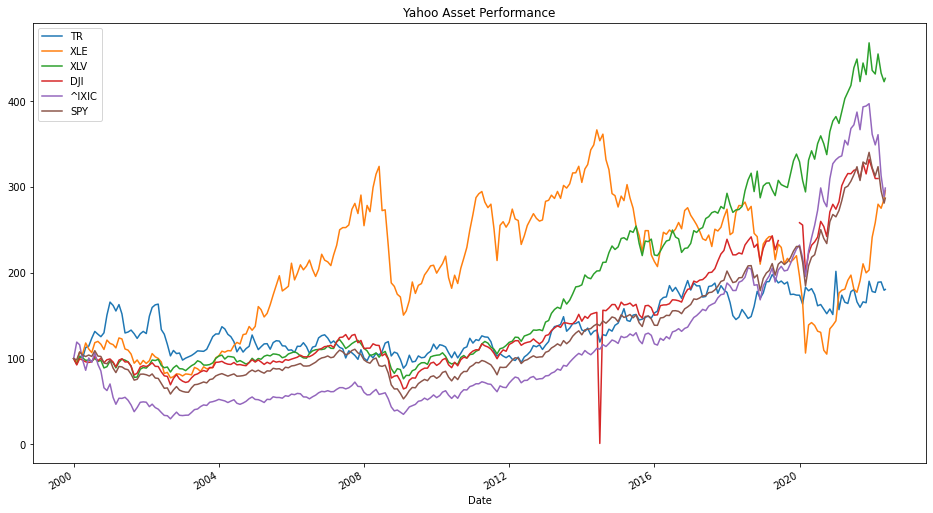

In [ ]:
sdf.plot(kind='line', title='Yahoo Asset Performance', figsize=(16,9))

In [ ]:
# Import Gold Data
gld = pd.read_csv(path+"gold.csv")
print(gld.head(50))

In [ ]:
gld = gld.copy()[33:]
gld.reset_index(drop=True)

In [ ]:
print(gld.head(6))

     Month    Gold  Change
33  Jan-00  284.32   0.44%
34  Feb-00  299.86   5.47%
35  Mar-00  286.39  -4.49%
36  Apr-00  279.69  -2.34%
37  May-00  275.19  -1.61%
38  Jun-00  285.73   3.83%


In [ ]:
gld['Gold'] = gld['Gold'].apply(lambda x: x.replace(',',''))
gld['Gold'] = gld['Gold'].astype(float)

In [ ]:
print(gld[['Gold']])

        Gold
33    284.32
34    299.86
35    286.39
36    279.69
37    275.19
..       ...
295  1821.76
296  1790.43
297  1816.02
298  1856.30
299  1947.83

[267 rows x 1 columns]


In [ ]:
gld_scale = 100.0 / gld['Gold'][33]
# print(gld_scale)
gld['Gold'] = gld['Gold'].apply(lambda x: x*gld_scale)
print(gld.head(4))

     Month        Gold  Change
33  Jan-00  100.000000   0.44%
34  Feb-00  105.465672   5.47%
35  Mar-00  100.728053  -4.49%
36  Apr-00   98.371553  -2.34%


In [ ]:
gold = pd.Series(gld_price['Gold'])
print(gold)

33     100.000000
34     105.465672
35     100.728053
36      98.371553
37      96.788829
          ...    
295    640.742825
296    629.723551
297    638.723973
298    652.891109
299    685.083708
Name: Gold, Length: 267, dtype: float64


In [ ]:
# Load yahoo asset data
with open(path+"yahoo-assets.pkl", 'rb') as fp:
  ydf = pickle.load(fp)

In [ ]:
print(ydf)

                    TR         XLE         XLV         DJI       ^IXIC  \
Date                                                                     
2000-01-01  100.000000  100.000000  100.000000  100.000000  100.000000   
2000-02-01   94.246028   95.766590   93.461339   92.576206  119.194737   
2000-03-01  103.000001  107.322654  101.868189   99.829993  116.051365   
2000-04-01  100.751985  105.720824  100.674624   98.111607   97.977586   
2000-05-01  112.809529  118.135011   97.976129   96.177504   86.309841   
...                ...         ...         ...         ...         ...   
2022-02-01  177.090824  258.416483  431.626385  309.790243  348.989304   
2022-03-01  188.943047  279.871862  454.974590  309.778354  360.894824   
2022-04-01  189.321364  275.148747  432.722344         NaN  313.034105   
2022-05-01  179.593179  285.986272  422.625843         NaN  288.577402   
2022-05-13  180.538971  295.835251  426.578109         NaN  298.680531   

                   SPY        Gold  


In [ ]:
ydf["Gold"] = gold

In [ ]:
ctr = -1
for val in ydf["Gold"]:
  ctr += 1
  print(ctr)
  ydf["Gold"][ctr] = gold[33+ctr]

In [ ]:
# Save asset data
with open(path+"assets.pkl", 'wb') as fp:
  pickle.dump(ydf, fp)

# Now we can analyze our data

In [ ]:
with open(path+"assets.pkl", 'rb') as fp:
  dfAssets = pickle.load(fp)
with open(path+"benchmark.pkl", 'rb') as fp:
  dfBenchmark = pickle.load(fp)

In [ ]:
# Plot
dfAssets.plot(kind='line', title="Asset Performance", figsize=(16,9))
dfBenchmark.plot(kind='line', title="CPI & PPI", figsize=(16,9))

In [ ]:
dfAssets.drop(dfAssets.tail(2).index,inplace=True)

In [ ]:
print(newdf)

In [ ]:
dfBenchmark["US PPI Index"] = dfBenchmark["US PPI Index"].astype(float)

In [ ]:
print(dfBenchmark.head(3))
print(dfAssets.head(3))

            US PPI Index  US CPI Index
DATE                                  
2000-01-01    100.000000    100.000000
2000-02-01    101.169135    100.413467
2000-03-01    101.948558    101.004135
                    TR         XLE         XLV         DJI       ^IXIC  \
Date                                                                     
2000-01-01  100.000000  100.000000  100.000000  100.000000  100.000000   
2000-02-01   94.246028   95.766590   93.461339   92.576206  119.194737   
2000-03-01  103.000001  107.322654  101.868189   99.829993  116.051365   

                   SPY        Gold  
Date                                
2000-01-01  100.000000  100.000000  
2000-02-01   98.477385  105.465672  
2000-03-01  107.747425  100.728053  


In [ ]:
print(type(dfBenchmark.index[0]))
print(type(dfAssets.index[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
dfBenchmark.index = pd.to_datetime(dfBenchmark.index)

In [ ]:
# Save frames
with open(path+"assets.pkl", 'wb') as fp:
  pickle.dump(dfAssets, fp)
with open(path+"benchmark.pkl", 'wb') as fp:
  pickle.dump(dfBenchmark, fp)

In [ ]:
df = pd.concat([dfAssets, dfBenchmark], axis=1, join='outer')

In [ ]:
# Save frames
with open(path+"final-2000.pkl", 'wb') as fp:
  pickle.dump(df, fp)

In [ ]:
print(df.head(10))

In [ ]:
df.plot(kind='line', title='Core Assets vs CPI/PPI', figsize=(16,9))

In [ ]:
tips = st = yf.download("TIP", start='2000-01-01', interval='1mo')

In [ ]:
tips = tips.copy()[['Close']]
tips.rename({tips.columns[0]:"TIP"}, axis=1, inplace=True)


In [ ]:
tips = tips.dropna()

In [ ]:
newdf = pd.concat([df,tips], axis=1, join='outer')

In [ ]:
print(newdf[35:55])

                    TR         XLE         XLV        DJI      ^IXIC  \
2002-12-01  106.428149   81.757437   88.178513  76.245417  33.893181   
2003-01-01   98.171988   79.707095   87.879603  73.614643  33.522657   
2003-02-01  100.473999   82.050343   85.920086  72.127234  33.944192   
2003-03-01  101.938941   81.720823   88.743122  73.050865  34.036824   
2003-04-01  103.546818   81.025169   91.665803  77.510990  37.161928   
2003-05-01  105.940749   89.629289   93.558900  80.894473  40.501732   
2003-06-01  108.942111   88.054917   97.411520  82.130071  41.184159   
2003-07-01  108.656260   84.942795   95.950180  84.400163  44.032129   
2003-08-01  108.406148   90.361557   92.396470  86.063894  45.946424   
2003-09-01  110.764361   88.054917   92.363257  84.777291  45.349776   
2003-10-01  117.874717   88.897028   92.994292  89.585669  49.036505   
2003-11-01  125.592494   89.592675   94.987028  89.415109  49.748372   
2003-12-01  128.629584  100.869562  100.134923  95.552309  50.84

## Get Portfolio

In [ ]:
portfolio = newdf.drop(columns=["US PPI Index", "US CPI Index"])

In [ ]:
print(newdf[35:55])

In [ ]:
with open(path+"portfolio.pkl", 'wb') as fp:
  pickle.dump(portfolio, fp)

In [ ]:
with open(path+"portfolio.pkl", 'rb') as fp:
  portfolio = pickle.load(fp)

In [ ]:
rets = portfolio.pct_change()

In [ ]:
rets.drop(rets.head(48).index,inplace=True)

In [ ]:
print(rets)

                  TR       XLE       XLV       DJI     ^IXIC       SPY  \
2004-01-01  0.000000  0.022505  0.027529  0.003271  0.031337  0.019770   
2004-02-01  0.065764  0.052538  0.010652  0.009134 -0.017583  0.013571   
2004-03-01 -0.018523 -0.010455 -0.044075 -0.021372 -0.017538 -0.016693   
2004-04-01 -0.047046  0.017042  0.031073 -0.012754 -0.037142 -0.018921   
2004-05-01 -0.021240 -0.003016 -0.003240 -0.003628  0.034680  0.017123   
...              ...       ...       ...       ...       ...       ...   
2022-02-01 -0.005891  0.070692 -0.009678 -0.035276 -0.034304 -0.029517   
2022-03-01  0.066927  0.083026  0.054094 -0.000038  0.034114  0.034377   
2022-04-01  0.002002 -0.016876 -0.048909  0.000000 -0.132617 -0.087769   
2022-05-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2022-05-13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                Gold       TIP  
2004-01-01  0.016808  0.000000  
2004-02-01 -0.021533  0.021467  
2004-03-01  

In [ ]:
rets['TIP'] = rets['TIP'].fillna(0)

In [ ]:
with open(path+"port-rets.pkl", 'wb') as fp:
  pickle.dump(rets, fp)

## Optimize Portfolio

In [ ]:
from numpy.linalg import inv

In [ ]:
with open(path+"port-rets.pkl", 'rb') as fp:
  rets = pickle.load(fp)
names = rets.columns

In [ ]:
# calculate historical mean return for each asset
E = np.array(rets.mean(axis=0)).reshape(-1, 1)

# Calculate covariance matrix of assets' returns
cov_matrix = np.array(rets.cov())

# Ones vector
ones = np.ones((E.shape[0], 1))

# Zeros
zeros = np.zeros((2, 2))

# Put together the A matrix
A = 2 * cov_matrix
A = np.append(A, E.T, axis=0)
A = np.append(A, ones.T, axis=0)
temp = np.append(E, ones, axis=1)
temp = np.append(temp, zeros, axis=0)
A = np.append(A, temp, axis=1)

# Put together the b vector
b = np.zeros((A.shape[1], 1))

# I set target return to be the expected return of commodities
b[A.shape[1] - 2][0] = E[0]
b[A.shape[1] - 1][0] = 1

# Now we want to optimize using matrix algebra
results = inv(A) @ b

# Grab first 4 elements of results because those are the weights
# Recall that we optimize across 4 assets so there are 4 weights
opt_W = results[: rets.shape[1]]


optimal_weights = pd.DataFrame(opt_W, columns=["Optimal Weights"], index=names)

In [ ]:
# show the result
print(optimal_weights)

       Optimal Weights
TR            0.064822
XLE           0.016530
XLV           0.081955
DJI           0.000082
^IXIC         0.051022
SPY          -0.012102
Gold          0.197415
TIP           0.600276


In [ ]:
# TODO, show performance and volatility of weighted portfolio
# and compare that to cpi + ppi benchmarks